<a href="https://colab.research.google.com/github/war-riz/object-detection-demo/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# See The World Through AI

# Day 1: Setup & Image Detection

Goal : Set up YOLO and detect objects in a single image.
- Install and import YOLO (Ultralytics YOLOv8)
- Load pretrained Module
- Run inference on an Image
- Display results

YOLO - You Only Look Once

In [3]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
upload = files.upload()
file_name = list(upload.keys())[0]
print("Uploaded:", file_name)

Saving four-person.jpg to four-person.jpg
Uploaded: four-person.jpg


In [12]:
model = YOLO("yolov8n.pt")

In [13]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/four-person.jpg: 480x640 6 persons, 6 cars, 1 backpack, 4 handbags, 171.7ms
Speed: 4.8ms preprocess, 171.7ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 640)


(np.float64(-0.5), np.float64(1299.5), np.float64(955.5), np.float64(-0.5))

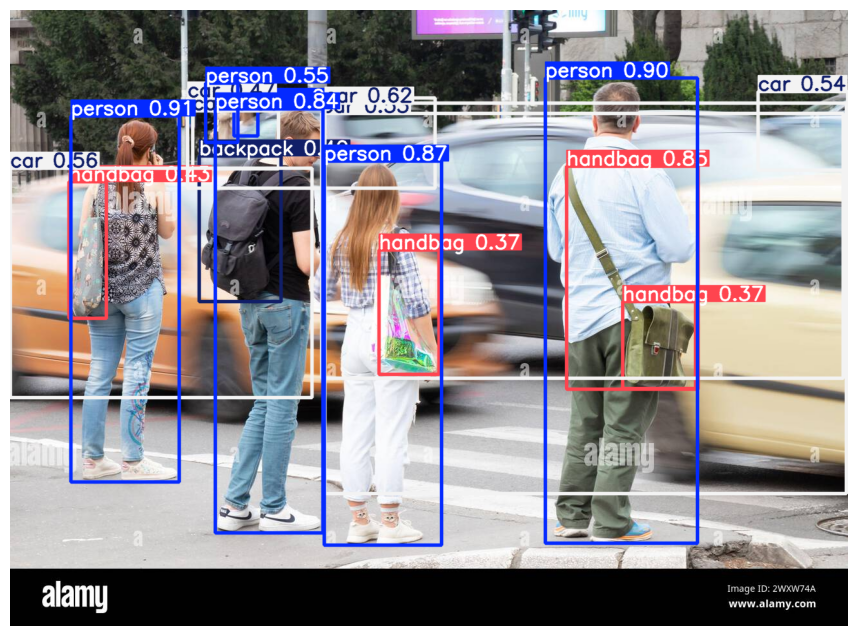

In [16]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')